# Недообучение и переобучение
## Цель работы
Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).

## Задания для выполнения
1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную Outcome.
4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [2]:
df = pd.read_csv('data/diabetes.csv', nrows=400)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2. Сделайте количественное описание датасета: число признаков, статистику по признакам.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               400 non-null    int64  
 1   Glucose                   400 non-null    int64  
 2   BloodPressure             400 non-null    int64  
 3   SkinThickness             400 non-null    int64  
 4   Insulin                   400 non-null    int64  
 5   BMI                       400 non-null    float64
 6   DiabetesPedigreeFunction  400 non-null    float64
 7   Age                       400 non-null    int64  
 8   Outcome                   400 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 28.3 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


### 3. Отделите целевую переменную Outcome.

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X.shape, y.shape

((400, 8), (400,))

### 4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [12]:
dtc = DecisionTreeClassifier(random_state=1)

In [13]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [15]:
f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)

(1.0, 0.6363636363636364)

Есть вероятность переобучение модели, показатель на трейновом равен 100%, когда на тестовой всего 67%.

### 6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
cv_results = cross_validate(dtc, X, y, cv=5, scoring='f1', return_train_score=False)

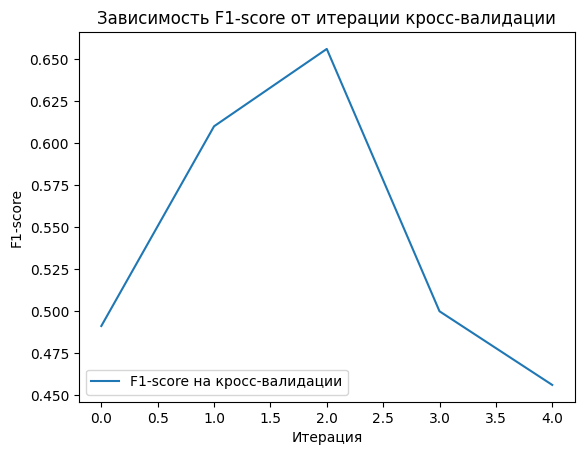

In [18]:
plt.plot(cv_results['test_score'], label='F1-score на кросс-валидации')
plt.xlabel('Итерация')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от итерации кросс-валидации')
plt.legend()
plt.show()

### 7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

In [19]:
dtc_regularized = DecisionTreeClassifier(random_state=1, max_depth=3)

In [20]:
dtc_regularized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [21]:
y_train_pred_regularized = dtc_regularized.predict(X_train)
y_test_pred_regularized = dtc_regularized.predict(X_test)

In [22]:
f1_score(y_train, y_train_pred_regularized), f1_score(y_test, y_test_pred_regularized)

(0.5058823529411764, 0.4782608695652174)

### 8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.

In [23]:
cv_results_regularized = cross_validate(dtc_regularized, X, y, cv=5, scoring='f1', return_train_score=False)

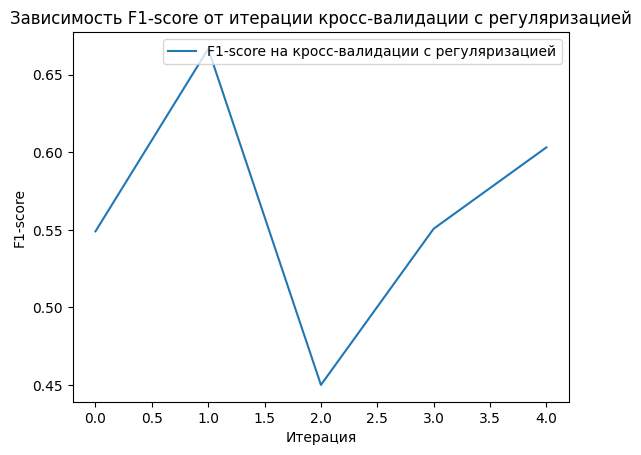

In [24]:
plt.plot(cv_results_regularized['test_score'], label='F1-score на кросс-валидации с регуляризацией')
plt.xlabel('Итерация')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от итерации кросс-валидации с регуляризацией')
plt.legend()
plt.show()

### 9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [25]:
df_full = pd.read_csv('data/diabetes.csv')

In [26]:
X_full = df_full.drop(columns=['Outcome'])
y_full = df_full['Outcome']

### 10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [27]:
dtc_full = DecisionTreeClassifier(random_state=1, max_depth=3)

In [28]:
dtc_full.fit(X_full, y_full)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [29]:
y_pred_test_full = dtc_full.predict(X_full)

In [30]:
f1_score(y_full, y_pred_test_full)

0.6653696498054474

## Задания для самостоятельного выполнения

### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты? 

In [31]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [32]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [35]:
y_pred = model.predict(X_test)

In [36]:
precision = precision_score(y_test, y_pred)
precision

0.9175257731958762

In [37]:
recall = recall_score(y_test, y_pred)
recall

0.8317757009345794

In [38]:
f1 = f1_score(y_test, y_pred)
f1

0.8725490196078431

<Axes: >

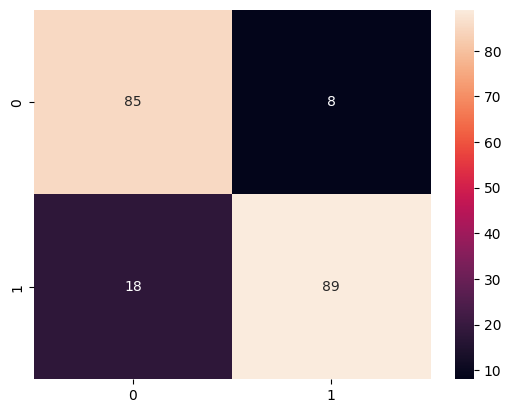

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### 2. Повторите диагностику модели регрессии с использованием других видов моделей

#### Метод опорных векторов (SVM) | Исследуйте влияние параметра С на недообучение и переобучение

In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [41]:
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
C_values = [0.1, 1, 10, 100, 1000, 10000]
for C in C_values:
    model_svr = SVR(C=C)
    model_svr.fit(X_train, y_train)
    y_pred = model_svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"SVM с C={C} - MSE: {mse:.4f}")

SVM с C=0.1 - MSE: 38351.7279
SVM с C=1 - MSE: 35191.2757
SVM с C=10 - MSE: 11834.0237
SVM с C=100 - MSE: 2860.4570
SVM с C=1000 - MSE: 2434.7675
SVM с C=10000 - MSE: 2435.8035


#### Метод ближайших соседей (KNN) | Исследуйте влияние количества соседей

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
k_values = [1, 3, 5, 7, 9, 11, 13]
for k in k_values:
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"KNN с k={k} - MSE: {mse:.4f}")

KNN с k=1 - MSE: 26559.7342
KNN с k=3 - MSE: 17003.5219
KNN с k=5 - MSE: 14831.3026
KNN с k=7 - MSE: 14092.0183
KNN с k=9 - MSE: 14509.5294
KNN с k=11 - MSE: 14245.9265
KNN с k=13 - MSE: 14296.7278


#### Метод решающих деревьев | Гиперпараметры по вашему выбору

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
depth_values = [3, 5, 10, 20, 4440]
for depth in depth_values:
    model_tree = DecisionTreeRegressor(max_depth=depth)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"DecisionTree с max_depth={depth} - MSE: {mse:.4f}")

DecisionTree с max_depth=3 - MSE: 23008.5595
DecisionTree с max_depth=5 - MSE: 18873.9984
DecisionTree с max_depth=10 - MSE: 17877.7434
DecisionTree с max_depth=20 - MSE: 17422.7801
DecisionTree с max_depth=4440 - MSE: 20964.6297


### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо. 

In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели. 

In [49]:
from sklearn.linear_model import ElasticNet

In [50]:
alphas = [0.1, 1, 10]
l1_ratios = [0.2, 0.5, 0.8]
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model_en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model_en.fit(X_train, y_train)
        y_pred = model_en.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"ElasticNet с alpha={alpha}, l1_ratio={l1_ratio} - MSE: {mse:.4f}")

ElasticNet с alpha=0.1, l1_ratio=0.2 - MSE: 232.0193
ElasticNet с alpha=0.1, l1_ratio=0.5 - MSE: 97.7103
ElasticNet с alpha=0.1, l1_ratio=0.8 - MSE: 17.7212
ElasticNet с alpha=1, l1_ratio=0.2 - MSE: 8022.6430
ElasticNet с alpha=1, l1_ratio=0.5 - MSE: 4638.8386
ElasticNet с alpha=1, l1_ratio=0.8 - MSE: 1260.6116
ElasticNet с alpha=10, l1_ratio=0.2 - MSE: 31013.3101
ElasticNet с alpha=10, l1_ratio=0.5 - MSE: 27867.3065
ElasticNet с alpha=10, l1_ratio=0.8 - MSE: 19479.6853


### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

Невозможно сделать

### 6. Повторите анализ на других реальных датасетах из репозитория OpenML

In [53]:
from openml.datasets import get_dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression

Было предложено 9 датасетов. Я решил взять два с разными задачами и решить их.

#### phoneme - классификация


In [54]:
dataset = get_dataset(1489)

In [55]:
dataset

OpenML Dataset
Name.........: phoneme
Version......: 1
Format.......: ARFF
Upload Date..: 2015-05-25 19:34:17
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/1592281/phoneme.arff
OpenML URL...: https://www.openml.org/d/1489
# of features: None

In [56]:
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [60]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(1.0, 0.8436632747456059)

#### Ailerons - регрессия


In [61]:
dataset_reg = get_dataset(43995)

In [62]:
dataset_reg

OpenML Dataset
Name.........: Ailerons
Version......: 4
Format.......: arff
Upload Date..: 2022-06-16 20:50:39
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/22103083/Ailerons.arff
OpenML URL...: https://www.openml.org/d/43995
# of features: None

In [63]:
X, y, _, _ = dataset_reg.get_data(target=dataset_reg.default_target_attribute)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [67]:
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.817392820979742, 0.8255621217400277)